In [1]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
import datetime

In [2]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])

In [3]:
ds = [xr.open_dataset(path+f) for f in files]

In [4]:
for i in range(7):
    dsd = ds[i].resample(TIME='24h').mean()
    dsm = ds[i].resample(TIME='ME').mean()
#    dsd.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/daily/"+files[i])
#    dsm.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/monthly/"+files[i])

<xarray.DataArray 'TIME' (TIME: 54408)> Size: 435kB
array(['2017-10-03T00:00:00.000000000', '2017-10-03T01:00:00.000000000',
       '2017-10-03T02:00:00.000000000', ..., '2023-12-17T21:00:00.000000000',
       '2023-12-17T22:00:00.000000000', '2023-12-17T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * TIME     (TIME) datetime64[ns] 435kB 2017-10-03 ... 2023-12-17T23:00:00
Attributes:
    axis:           T
    time_origin:    15-JAN-1901
    standard_name:  time

In [35]:
figlab1 = ["a1)","b1)","c1)","d1)","e1)","f1)","g1)"]
figlab2 = ["a2)","b2)","c2)","d2)","e2)","f2)","g2)"]

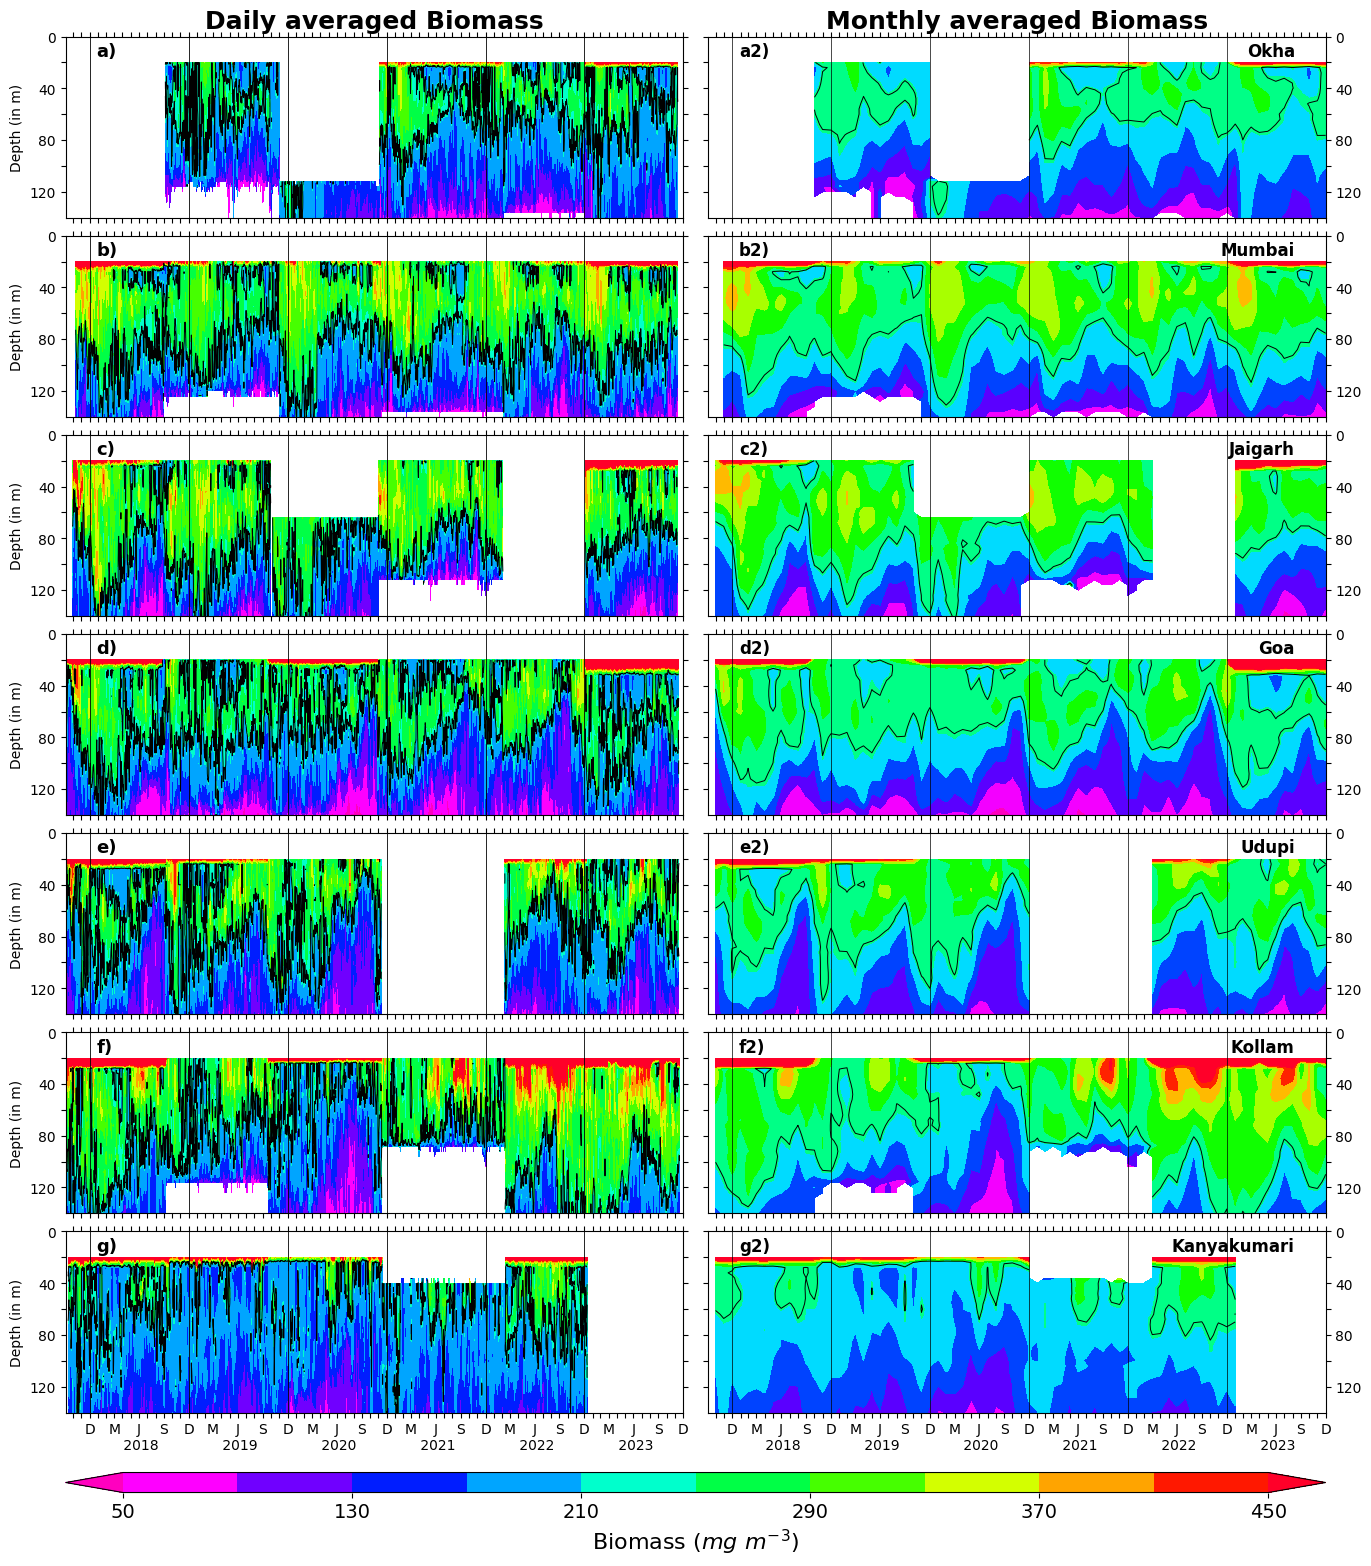

In [43]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(14,16),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsd = ds[i].resample(TIME='24h').mean()
    dsm = ds[i].resample(TIME='ME').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i,0].axvline(t,color='k',linewidth=0.6)
            ax[i,1].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i,0].contourf(dsd.TIME,dsd.DEPTH1[5:],dsd.BIOMASS1[:,5:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contourf(dsm.TIME,dsm.DEPTH1[5:],dsm.BIOMASS1[:,5:,0,0].T,levels=np.arange(50,450,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contour(dsm.TIME,dsm.DEPTH1[5:],dsm.BIOMASS1[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,0].contour(dsd.TIME,dsd.DEPTH1[5:],dsd.BIOMASS1[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,1].text(0.95, 0.97, names[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    
    ax[i,1].text(0.05, 0.97, figlab2[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='left',color='black',fontweight="bold")    
    ax[i,0].text(0.05, 0.97, figlab1[i],transform=ax[i,0].transAxes, fontsize=13, va='top', ha='left',color='black',fontweight="bold")    
    
    ax[i,0].set_ylabel("Depth (in m)")
    ax[i,0].set_yticks(custom_ticks)
    ax[i,0].set_yticklabels(custom_labels)
#    ax[i,1].set_yticks(custom_ticks)    
    ax[i,0].tick_params(right=True, top=True,labeltop=False)
    ax[i,1].tick_params(right=True, top=True,labelright=True)
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()
    
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()

ax[1,1].set_xticks(dsm.TIME,tklb)

ax[0,0].set_title("Daily averaged Biomass",fontsize=18,fontweight='bold')
ax[0,1].set_title("Monthly averaged Biomass",fontsize=18,fontweight='bold')


cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/biomass_daily_monthly.png",dpi=300,facecolor='w')
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/biomass_daily_monthly.png",dpi=300,facecolor='w')

# for just montly values

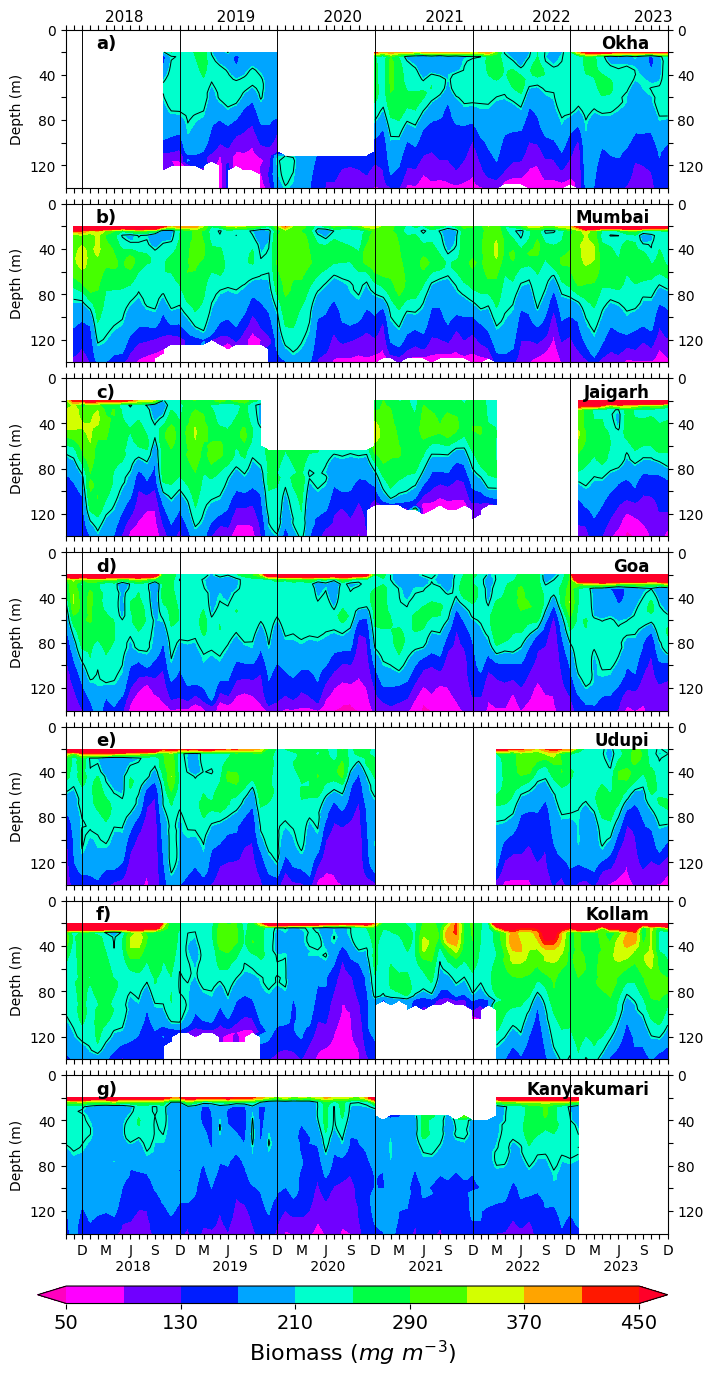

In [47]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(7,14),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
figlab = ["a)","b)","c)","d)","e)","f)","g)"]

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsm = ds[i].resample(TIME='ME').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
            ax[i].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i].contourf(dsm.TIME,dsm.DEPTH1[5:],dsm.BIOMASS1[:,5:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i].contour(dsm.TIME,dsm.DEPTH1[5:],dsm.BIOMASS1[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i].text(0.97, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].set_ylabel("Depth (m)")
    ax[i].text(0.05, 0.97, figlab[i],transform=ax[i].transAxes, fontsize=13, va='top', ha='left',color='black',fontweight="bold")    
    ax[i].set_yticks(custom_ticks)
    ax[i].set_yticklabels(custom_labels)
    ax[i].tick_params(right=True, top=True,labeltop=False)
    ax[i].tick_params(right=True, top=True,labelright=True)
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].invert_yaxis()
    
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].invert_yaxis()

ax[1].set_xticks(dsm.TIME,tklb)

ax[0].set_title("        2018               2019              2020             2021              2022             2023",fontsize=11,loc='left')


cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/biomass_monthly.png",dpi=300,facecolor='w')
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/biomass_monthly.png",dpi=300,facecolor='w')

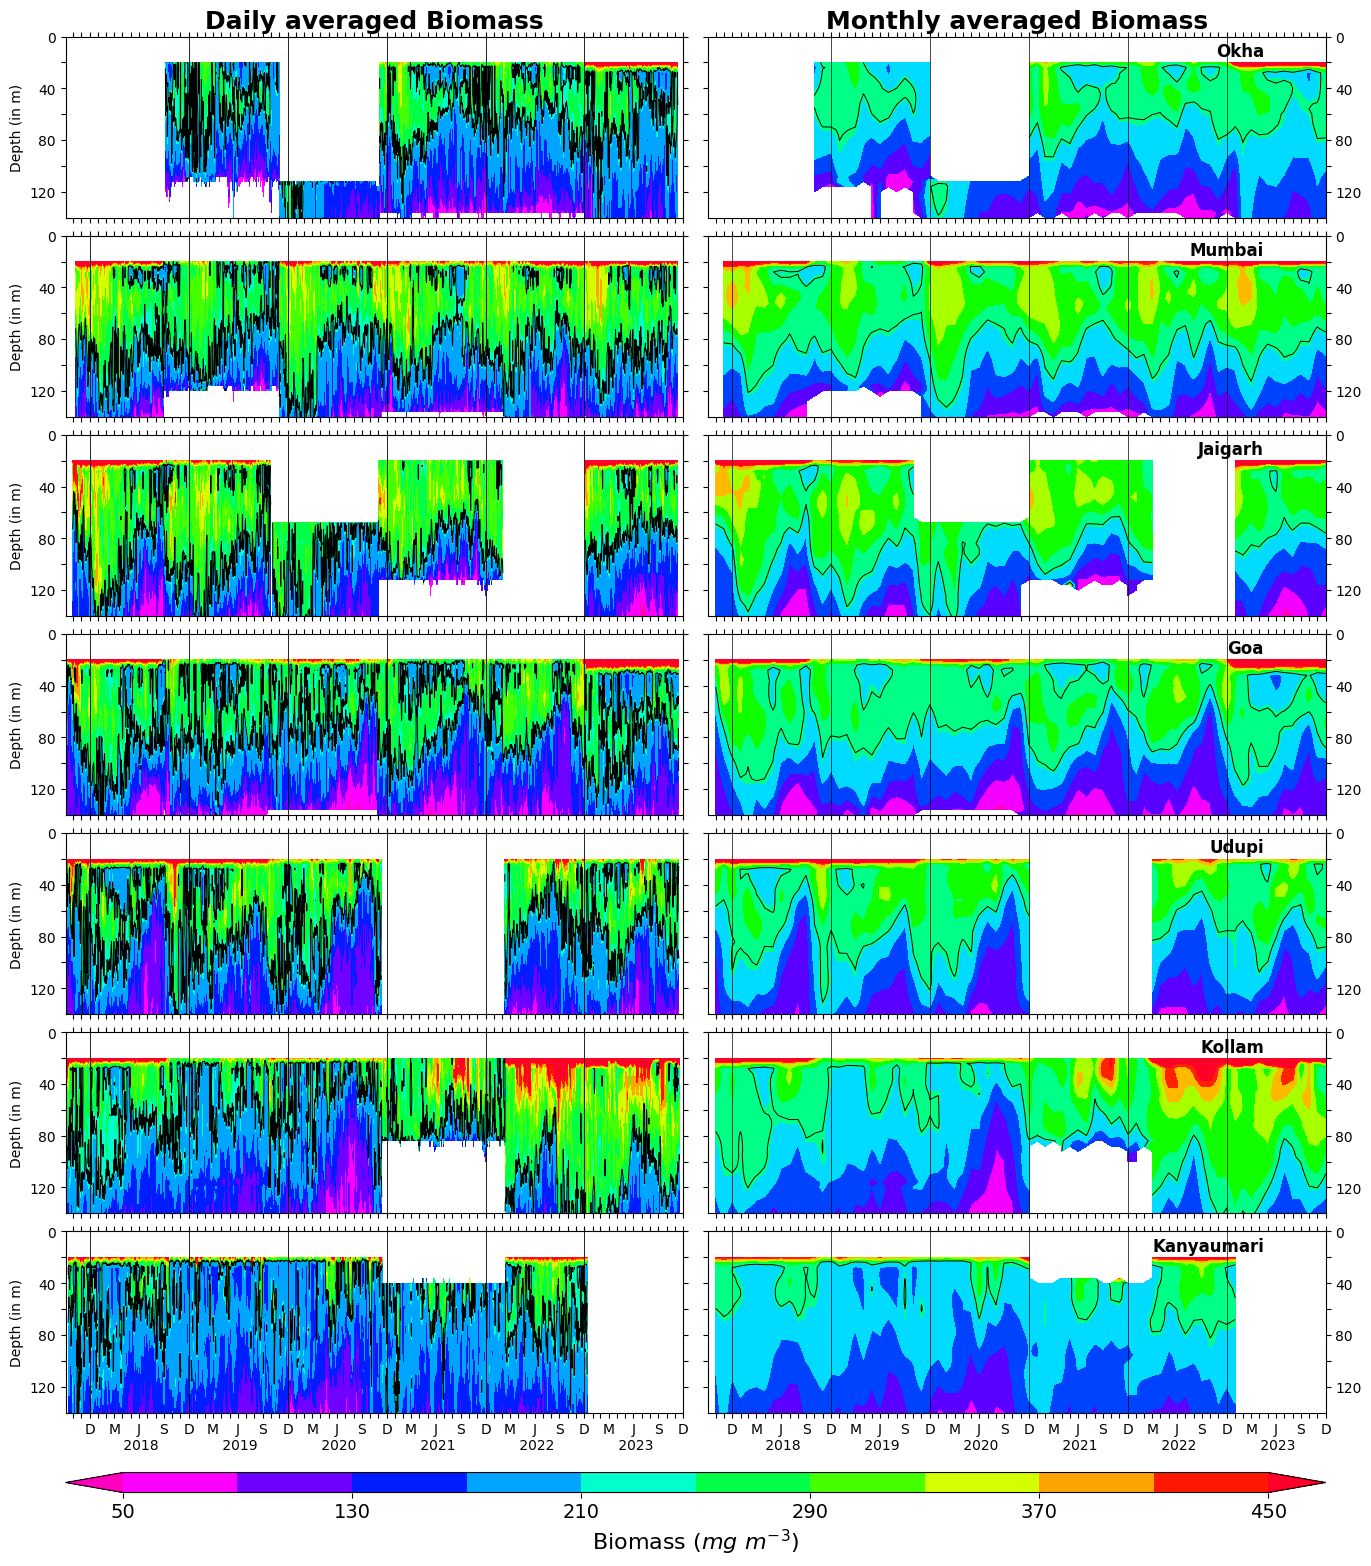

In [42]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(14,16),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyaumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsd = ds[i].resample(TIME='24H').mean()
    dsm = ds[i].resample(TIME='M').mean()
    tklb = []
    for t in dsm.TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i,0].axvline(t,color='k',linewidth=0.6)
            ax[i,1].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")

    x = ax[i,0].contourf(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contourf(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=np.arange(50,450,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contour(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,0].contour(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=0.7,colors='k')
    ax[i,1].text(0.9, 0.97, names[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i,0].set_ylabel("Depth (in m)")
    ax[i,0].set_yticks(custom_ticks)
    ax[i,0].set_yticklabels(custom_labels)
#    ax[i,1].set_yticks(custom_ticks)    
    ax[i,0].tick_params(right=True, top=True,labeltop=False)
    ax[i,1].tick_params(right=True, top=True,labelright=True)
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()
    
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()

ax[1,1].set_xticks(dsm.TIME,tklb)

ax[0,0].set_title("Daily averaged Biomass",fontsize=18,fontweight='bold')
ax[0,1].set_title("Monthly averaged Biomass",fontsize=18,fontweight='bold')

#ax[6,0].text(0.05, -0.2, "2017          2018           2019          2020          2021         2022",transform=ax[6,0].transAxes, fontsize=12, va='center', ha='left',color='black')
#ax[6,1].text(0.05, -0.2, "2017          2018           2019          2020          2021         2022",transform=ax[6,1].transAxes, fontsize=12, va='center', ha='left',color='black')


cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/6bs/bs/bs_regridded/bs_bm/merged/biomass_daily_monthly.png",dpi=300,facecolor='w')

16.50707742375389 21.830487185178125 range 5.323409761424234
19.27780782706811 26.592017576415845 range 7.314209749347736
18.687283037333906 25.63608377129064 range 6.948800733956734
16.230595931435946 22.281853828997487 range 6.051257897561541
16.802838712521304 21.924835560780334 range 5.12199684825903
20.444540755055105 23.972679798014305 range 3.5281390429592
16.592827272384596 18.452992966168527 range 1.8601656937839302


# Try plotting in polar project

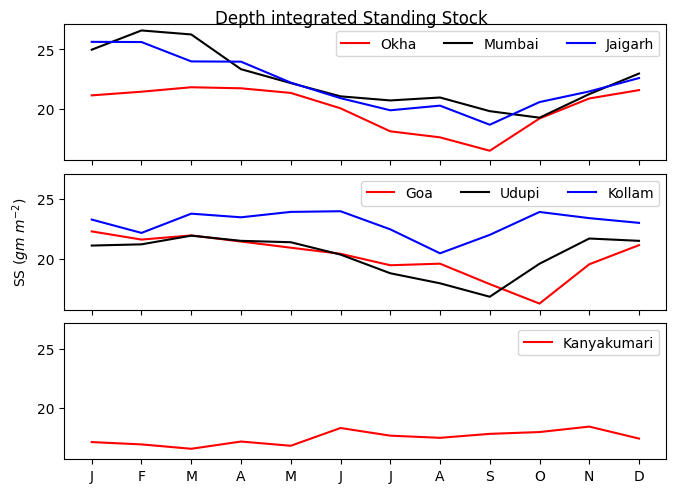

In [29]:

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(7,5),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
colors = ['r','k','b','r','k','b','r']

#linestyles = ['-','--','-.','-','--','-.','-']

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.08,top=0.95,hspace=0.1,right = 0.95)
for i in range(3):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    ax[0].plot(aa,color=colors[i],label=names[i])
ax[0].legend(bbox_to_anchor=(1,1), ncol=3)

for i in range(3,6):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T    
    aa = aa.where(aa!=0,np.nan)
    ax[1].plot(aa,color=colors[i],label=names[i])
ax[1].legend(bbox_to_anchor=(1,1), ncol=3)
ax[1].set_ylabel("SS ($gm \ m^{-2}$)")
for i in range(6,7):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T 
    aa = aa.where(aa!=0,np.nan)
    ax[2].plot(aa,color=colors[i],label=names[i])
ax[2].legend(bbox_to_anchor=(1,1), ncol=3)


ax[2].set_xticks(np.arange(0,12,1))
ax[2].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
fig.suptitle("Depth integrated Standing Stock")

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/standing_stock_dep_22_118_all_aval.png",dpi=300,facecolor='w')


# 40 and 100 m biomass comparison

In [10]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])
ds = [xr.open_dataset(path+f) for f in files]

In [11]:
dsd = [ds[i].resample(TIME='24h').mean() for i in range(len(files))]


In [12]:
dsm = [ds[i].rolling(TIME=720,min_periods=48).mean() for i in range(len(files))]

In [13]:
dsmon = [ds[i].resample(TIME='ME').mean() for i in range(7)]

Text(0.5, 0, 'Time')

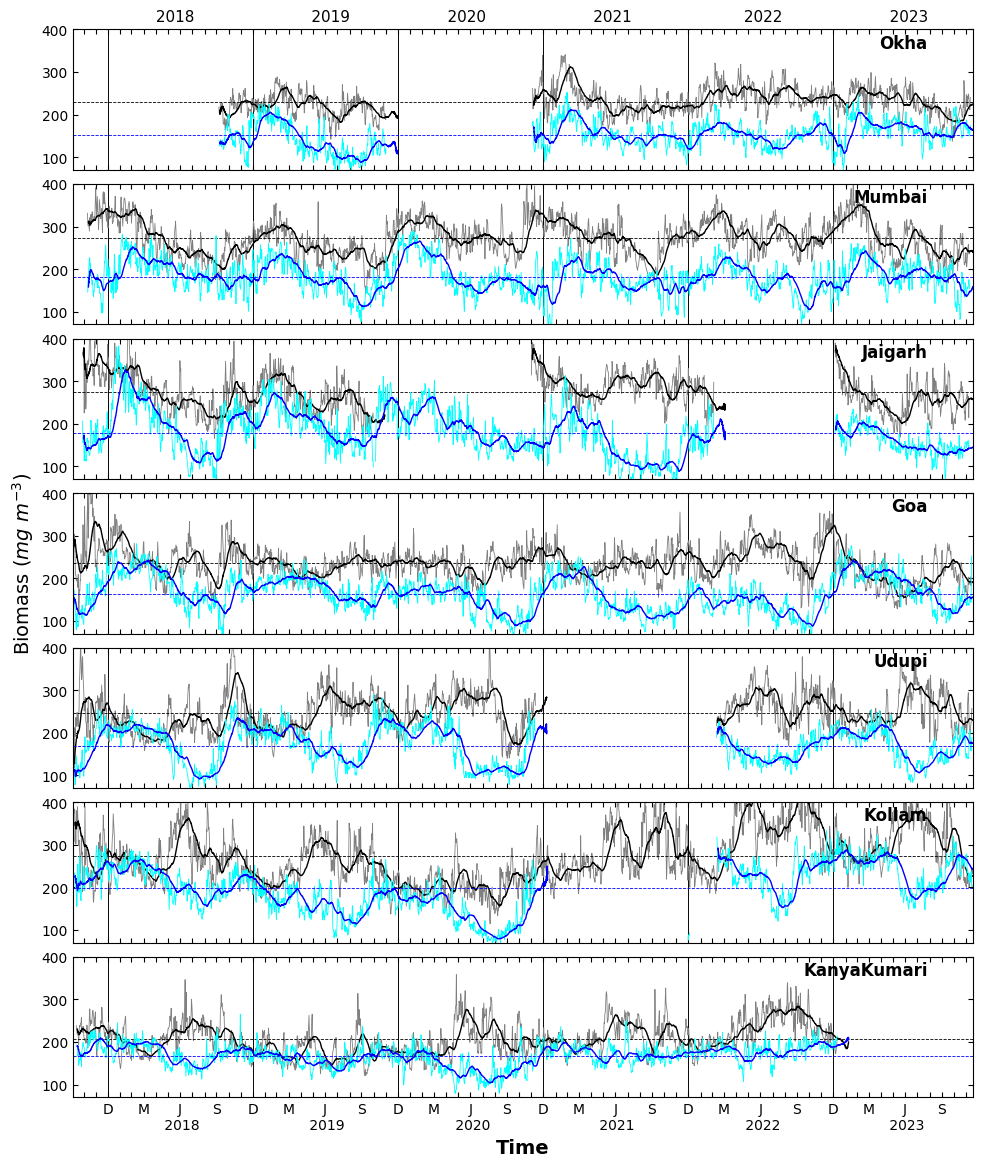

In [23]:
import pandas as pd

fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(10,12),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","KanyaKumari"]
plt.subplots_adjust(wspace=0.04,left=0.07,bottom=0.06,top=0.95,hspace=0.1,right = 0.97)
diff_40_104 = []      #diff in biomass btween 40 and 104
bm40 = []            #mean biomass at 40 m
bm104 = []          #mean biomass at 104 m
for i in range(7):
    tklb = []
    for t in dsmon[i].TIME.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
            ax[i].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
            
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS1[:,10,0,0].T,linewidth=0.6,color='grey',label="daily biomass (40m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS1[:,10,0,0].T,linewidth=1,color='k',label="monthly biomass (40m)")
    # plot the mean line for each
    ax[i].axhline(dsm[i].BIOMASS1[:,10,0,0].T.mean(),linewidth=0.6,linestyle='--',color='black',label="mean (40m)")
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS1[:,26,0,0].T,linewidth=0.6,color='cyan',label="daily biomass (104m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS1[:,26,0,0].T,linewidth=1,color='blue',label="monthly biomass (104m)")
    diff = dsm[i].BIOMASS1[:,10,0,0].T.mean() - dsm[i].BIOMASS1[:,26,0,0].T.mean()
    bm40.append(dsm[i].BIOMASS1[:,10,0,0].T.mean().values.round(4))
    bm104.append(dsm[i].BIOMASS1[:,26,0,0].T.mean().values.round(4))
    diff_40_104.append(diff.values.round(4))
    ax[i].axhline(dsm[i].BIOMASS1[:,26,0,0].T.mean(),linewidth=0.6,linestyle='--',color='blue',label="mean (104m)")

    ax[i].set_xticks(dsmon[i].TIME,tklb)

    ax[i].text(0.95, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].tick_params(axis='both', which='both', direction='in', right=True, top=True)
    
    
    ax[i].set_xlim(xmin=dsd[i].TIME[0],xmax=dsd[i].TIME[-1])
    ax[i].set_ylim(ymin=70,ymax=400)
ax[0].set_title("                 2018                        2019                    2020                      2021                       2022                      2023",fontsize=11,loc='left')

ax[3].set_ylabel('Biomass ($mg \ m^{-3}$)',fontsize=14)    


#ax[0].legend(loc='upper left')

ax[6].set_xlabel("Time",fontsize=14,fontweight='bold')

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/figure_02_biomass_40m_104m.png",dpi=300,facecolor='w')

In [28]:

for i in range(7):
    print(names[i],bm40[i],bm104[i],"diff",diff_40_104[i])

Okha 230.4162 151.6791 diff 78.7372
Mumbai 272.8609 182.2387 diff 90.6222
Jaigarh 274.4375 178.8117 diff 95.6258
Goa 235.2243 163.0211 diff 72.2032
Udupi 247.8062 169.3715 diff 78.4347
Kollam 272.8175 199.1362 diff 73.6813
KanyaKumari 207.0692 167.6291 diff 39.4401


In [ ]:
tklb = []
for t in dsmon[0].TIME.values:
    monlb = str(pd.to_datetime(t).month_name()[0:3])
    if monlb =="Jun":
        yrlb = str(pd.to_datetime(t).year)
        tklb.append(f'{monlb[0]}\n {yrlb}')
    elif monlb == "Sep":
        tklb.append(f'{monlb[0]}')
    elif monlb == "Dec":
        tklb.append(f'{monlb[0]}')
    elif monlb == "Mar":
        tklb.append(f'{monlb[0]}')
    else: 
        tklb.append("")


# climatology of standing stock

In [39]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/ss/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])


In [40]:
dsd = [xr.open_dataset(path+f) for f in files]
dsm = [dsd[i].resample(TIME1='1ME').mean() for i in range(len(files))]

for i in range(7):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    print(aa.min().values,aa.max().values,"range",aa.max().values-aa.min().values)

16.50707742375389 21.830487185178125 range 5.323409761424234
19.27780782706811 26.592017576415845 range 7.314209749347736
18.687283037333906 25.63608377129064 range 6.948800733956734
16.230595931435946 22.281853828997487 range 6.051257897561541
16.802838712521304 21.924835560780334 range 5.12199684825903
20.444540755055105 23.972679798014305 range 3.5281390429592
16.592827272384596 18.452992966168527 range 1.8601656937839302


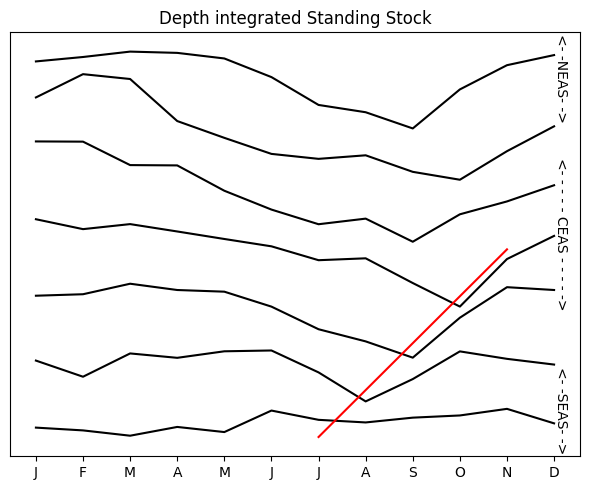

In [47]:

names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
colors = ['r','k','b','r','k','b','r']
fig = plt.figure(figsize=(6,5))
#linestyles = ['-','--','-.','-','--','-.','-']

for i in range(7):
    clim = dsm[i].groupby('TIME1.month').mean(dim='TIME1')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan) 
    aa = aa - np.mean(aa) - 4 * i
    plt.plot(aa,color='k',label=names[i])
    plt.gca().set_xticks(np.arange(0,12,1))

plt.gca().tick_params(left=False,labelleft=False,right=False,labelright=False)
plt.plot([6,10],[-25,-12],color='red')
plt.gca().set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.title("Depth integrated Standing Stock")
plt.text(11,-3,"<- -NEAS- ->",rotation=-90)
plt.text(11,-16,"<- - - - - CEAS - - - - ->",rotation=-90)
plt.text(11,-26,"<- -SEAS- ->",rotation=-90)

fig.tight_layout()
plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/7adcp_biomass/figures/propagation_of_minima_to_ceas.png",dpi=300,facecolor='w')
